In [1]:
import os
from PIL import Image

data_dir = '/kaggle/input/129-food/129-food/images'  # Thay đổi đường dẫn tới thư mục dữ liệu của bạn

invalid_images = []

# Lặp qua tất cả các tệp trong thư mục dữ liệu
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            # Mở và kiểm tra hình ảnh
            img = Image.open(file_path)
            img.verify()  # Kiểm tra tính hợp lệ của hình ảnh
        except (IOError, SyntaxError) as e:
            # Nếu có lỗi, thêm tệp không hợp lệ vào danh sách
            print('Invalid file:', file_path)
            invalid_images.append(file_path)

In [2]:
invalid_images

[]

In [3]:
# Tạo danh sách các tệp hợp lệ từ tất cả các tệp
list_images = []
for root, dirs, files in os.walk(data_dir):
    dirs.sort()
    files.sort()
    for file in files:
        file_path = os.path.join(root, file)
        if file_path not in invalid_images:
            list_images.append(file_path)
# Số lượng ảnh trong tập dữ liệu
num_samples = len(list_images)
num_samples 

18200

In [ ]:
list_images

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import DirectoryIterator
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
# Kích thước ảnh đầu vào 150x150
img_width, img_height = 150, 150

# Khởi tạo mô hình ResNet50 và bỏ đi lớp fully connected (top layer)
model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
# Trích xuất đặc trưng từ mô hình ResNet50
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array, verbose=0)
    return features.flatten()

In [ ]:
# Trích xuất đặc trưng từ các ảnh trong tập dữ liệu huấn luyện
train_features = [extract_features(image_path) for image_path in list_images]

In [8]:
import os
import pickle

# Đường dẫn đến thư mục working trên Kaggle
kaggle_working_dir = '/kaggle/working'

# Đường dẫn đến tệp train_features.pkl trong thư mục working
file_path = os.path.join(kaggle_working_dir, 'train_features150x150.pkl')

# Lưu các đặc trưng vào tệp train_features.pkl trong thư mục working
with open(file_path, 'wb') as file:
    pickle.dump(train_features, file)

In [9]:
import pickle
import numpy as np

# Đường dẫn đến tệp train_features.pkl
file_path = '/kaggle/working/train_features150x150.pkl'

# Đọc các đặc trưng từ tệp
with open(file_path, 'rb') as file:
    train_features = pickle.load(file)

# Chuyển đổi thành mảng numpy
train_features_np = np.array(train_features)

# Kiểm tra kích thước của mảng numpy
print("Kích thước của mảng numpy:", train_features_np.shape)

Kích thước của mảng numpy: (18200, 32768)


In [ ]:
# Chuyển đổi danh sách đặc trưng sang mảng NumPy
X_train = np.array(train_features)

In [10]:
X_train.shape

(18200, 51200)

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_71.jpg


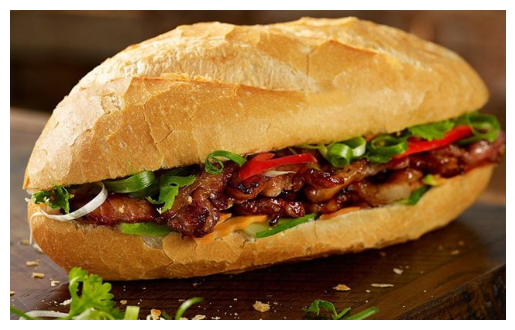

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_76.jpg


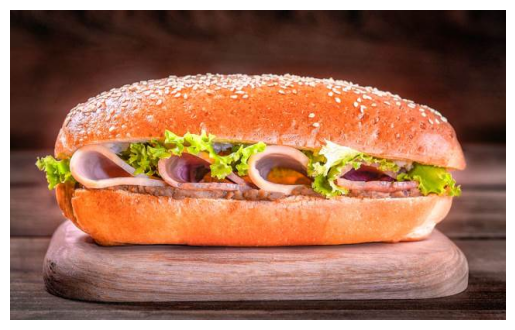

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_387.jpg


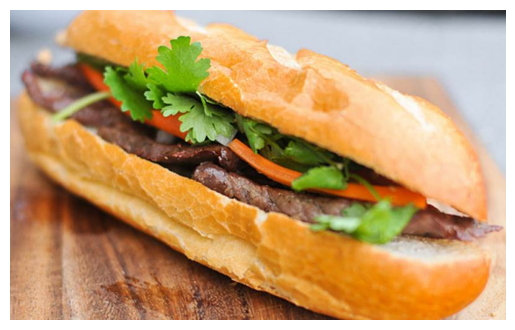

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_389.jpg


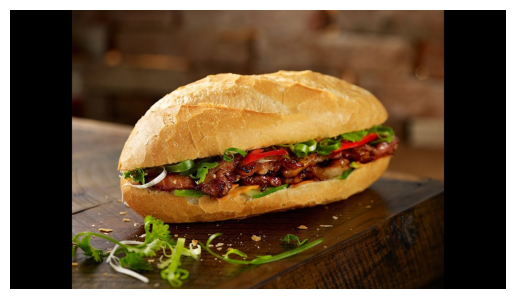

/kaggle/input/129-food/129-food/images/hot_dog/hot_dog_378.jpg


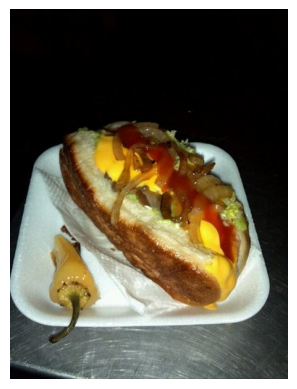

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_82.jpg


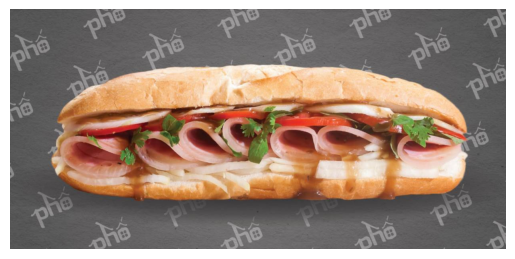

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_86.jpg


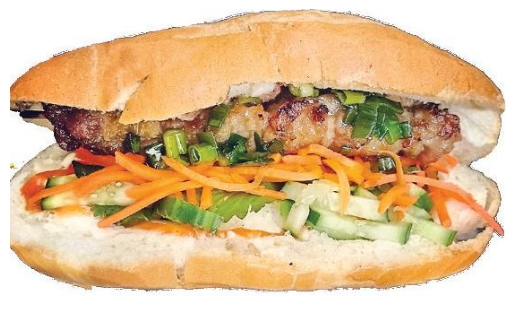

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_350.jpg


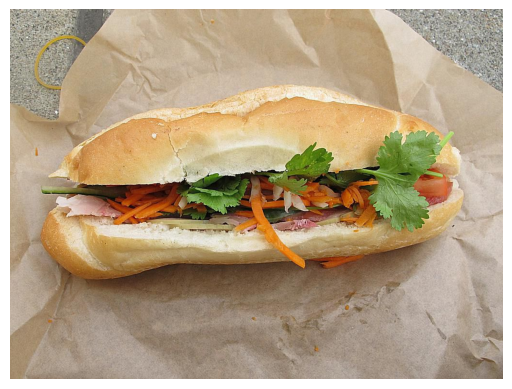

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_81.jpg


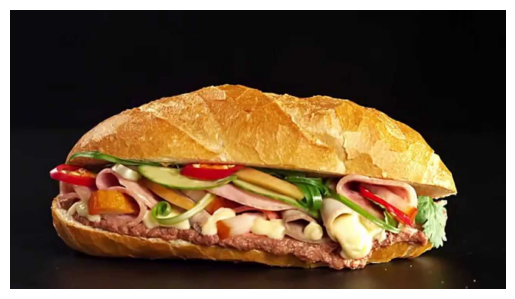

/kaggle/input/129-food/129-food/images/banh_mi/banh_mi_333.jpg


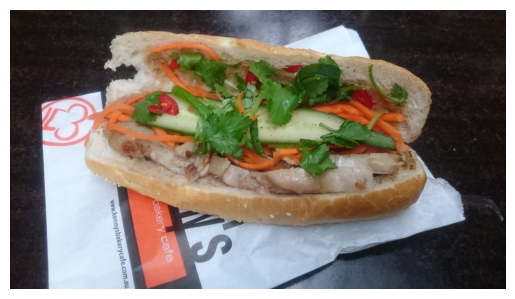

In [12]:
# Khi có một ảnh mới đầu vào
new_image_path = "/kaggle/input/banhmi/clever-junior-830.jpg"

# Trích xuất đặc trưng của ảnh mới
new_image_feature = extract_features(new_image_path)

x_test = [new_image_feature]

# Tính toán cosine similarity giữa vector đặc trưng của hình ảnh mới và tất cả các hình ảnh trong X_train
cos_similarities = cosine_similarity(x_test, X_train)

# Sắp xếp các món ăn dựa trên cosine similarity
sorted_indices = np.argsort(cos_similarities[0])[::-1]

# Lấy danh sách các món ăn tương tự (ví dụ: 10 món ăn tương tự đầu tiên)
num_similar_items = 10
similar_items = sorted_indices[:num_similar_items]

# Duyệt qua từng đường dẫn ảnh trong danh sách similar_items
for i in similar_items:
    # Đường dẫn đầy đủ tới ảnh
    image_path = list_images[i]
    
    # Đọc và hiển thị ảnh
    print(list_images[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Tắt các trục
    plt.show()